In [56]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import string
import statistics
import itertools

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

from collections import Counter
import spacy
nlp = spacy.load('en')

In [2]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


DONALD_TRUMP = 'realdonaldtrump'
DONALD_TRUMP_NAME = 'President Donald J. Trump'
DONALD_TRUMP_BIO = '45th President of the United States'
DONALD_TRUMP_COLOR = '#446fc4'
DONALD_TRUMP_TRAIN_SET = DONALD_TRUMP_NAME + DONALD_TRUMP + DONALD_TRUMP_BIO + 'president of the united state of america.'

BARACK_OBAMA = 'barackobama'
BARACK_OBAMA_NAME = 'Barack Obama'
BARACK_OBAMA_BIO = 'Dad, husband, President, citizen.'
BARACK_OBAMA_COLOR = '#7f2d9b'
BARACK_OBAMA_TRAIN_SET = BARACK_OBAMA + BARACK_OBAMA_NAME + BARACK_OBAMA_BIO + '44th President of the United States.'

EMMANUEL_MACRON = 'emmanuelmacron'
EMMANUEL_MACRON_NAME = 'Emmanuel Macron'
EMMANUEL_MACRON_BIO = 'Président de la République française.'
EMMANUEL_MACRON_COLOR = '#369b4f'
EMMANUEL_MACRON_TRAIN_SET = EMMANUEL_MACRON + EMMANUEL_MACRON_NAME + EMMANUEL_MACRON_BIO

#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
REUTERS = 'reuters'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
CRISTIANO_RONALDO = 'cristiano'
RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

POLITICIAN = [DONALD_TRUMP, BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY]
NEWS_AGENCY = [CNN, BBC, FOXNEWS, REUTERS]
SPROTS_STAR = [LEOMESSI, CRISTIANO_RONALDO, ROGER_FEDERER, RAFAEL_NADAL]


LIST_ALL_USERS = [DONALD_TRUMP , BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY, 
                  BBC, CNN, FOXNEWS, REUTERS, 
                  LEOMESSI, CRISTIANO_RONALDO, RAFAEL_NADAL, ROGER_FEDERER ]


NAME_POLITICIAN = "politician"
NAME_NEWSAGENCY = "news agency"
NAME_SPORTSTAR = "sports star"

NAME_CLUSTER_0  = "C0_Fan_Page"
NAME_CLUSTER_1 = "C1_Ordinary_User"
NAME_CLUSTER_2 = "C2_Botlike"

LIST_CLUSTERS = ['C0_Fan_Page', 'C1_Ordinary_User', 'C2_Botlike' ]

LIST_CATEGORIES = ['Politician', 'News agency', 'Sports star' ]

LIST_PLOT_PATTERN = ['///', 'O', '\\\ ', '//\\',
                    '', '', '', '',
                    '==', 'oo', '0//', '////']


# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# define colors

COLOR_POLITICIAN = '#3e80f0'
COLOR_NEWSAGENCY = '#32a840'
COLOR_SPORTSARTS = '#f56d25'


COLOR_C0 = '#446fc4'
COLOR_C1 = '#7f2d9b'
COLOR_C2 = '#369b4f'


COLORS_COMMUNITIES = [ COLOR_POLITICIAN,
              COLOR_NEWSAGENCY,
              COLOR_SPORTSARTS
                 ]

COLORS_CLUSTERS = [ COLOR_C0,
              COLOR_C1,
              COLOR_C2
                 ]

# Load Clustered Data

In [4]:
df_clustered = pd.read_csv('clustered_data_new.csv')
print(df_clustered.shape[0])

3832


In [5]:
df_c0_comment_trump = pd.read_csv('DataFrames/df_c0_comment_trump.csv')
df_c0_comment_obama = pd.read_csv('DataFrames/df_c0_comment_obama.csv')
df_c0_comment_macron = pd.read_csv('DataFrames/df_c0_comment_macron.csv')
df_c0_comment_may = pd.read_csv('DataFrames/df_c0_comment_may.csv')

df_c0_comment_bbc = pd.read_csv('DataFrames/df_c0_comment_bbc.csv')
df_c0_comment_cnn = pd.read_csv('DataFrames/df_c0_comment_cnn.csv')
df_c0_comment_foxnews = pd.read_csv('DataFrames/df_c0_comment_foxnews.csv')
df_c0_comment_reuters = pd.read_csv('DataFrames/df_c0_comment_reuters.csv')

df_c0_comment_messi = pd.read_csv('DataFrames/df_c0_comment_messi.csv')
df_c0_comment_ronaldo = pd.read_csv('DataFrames/df_c0_comment_ronaldo.csv')
df_c0_comment_nadal = pd.read_csv('DataFrames/df_c0_comment_nadal.csv')
df_c0_comment_federer = pd.read_csv('DataFrames/df_c0_comment_federer.csv')


df_c0_like_trump = pd.read_csv('DataFrames/df_c0_like_trump.csv')
df_c0_like_obama = pd.read_csv('DataFrames/df_c0_like_obama.csv')
df_c0_like_macron = pd.read_csv('DataFrames/df_c0_like_macron.csv')
df_c0_like_may = pd.read_csv('DataFrames/df_c0_like_may.csv')

df_c0_like_bbc = pd.read_csv('DataFrames/df_c0_like_bbc.csv')
df_c0_like_cnn = pd.read_csv('DataFrames/df_c0_like_cnn.csv')
df_c0_like_foxnews = pd.read_csv('DataFrames/df_c0_like_foxnews.csv')
df_c0_like_reuters = pd.read_csv('DataFrames/df_c0_like_reuters.csv')

df_c0_like_messi = pd.read_csv('DataFrames/df_c0_like_messi.csv')
df_c0_like_ronaldo = pd.read_csv('DataFrames/df_c0_like_ronaldo.csv')
df_c0_like_nadal = pd.read_csv('DataFrames/df_c0_like_nadal.csv')
df_c0_like_federer = pd.read_csv('DataFrames/df_c0_like_federer.csv')

In [6]:
df_c1_comment_trump = pd.read_csv('DataFrames/df_c1_comment_trump.csv')
df_c1_comment_obama = pd.read_csv('DataFrames/df_c1_comment_obama.csv')
df_c1_comment_macron = pd.read_csv('DataFrames/df_c1_comment_macron.csv')
df_c1_comment_may = pd.read_csv('DataFrames/df_c1_comment_may.csv')

df_c1_comment_bbc = pd.read_csv('DataFrames/df_c1_comment_bbc.csv')
df_c1_comment_cnn = pd.read_csv('DataFrames/df_c1_comment_cnn.csv')
df_c1_comment_foxnews = pd.read_csv('DataFrames/df_c1_comment_foxnews.csv')
df_c1_comment_reuters = pd.read_csv('DataFrames/df_c1_comment_reuters.csv')

df_c1_comment_messi = pd.read_csv('DataFrames/df_c1_comment_messi.csv')
df_c1_comment_ronaldo = pd.read_csv('DataFrames/df_c1_comment_ronaldo.csv')
df_c1_comment_nadal = pd.read_csv('DataFrames/df_c1_comment_nadal.csv')
df_c1_comment_federer = pd.read_csv('DataFrames/df_c1_comment_federer.csv')


df_c1_like_trump = pd.read_csv('DataFrames/df_c1_like_trump.csv')
df_c1_like_obama = pd.read_csv('DataFrames/df_c1_like_obama.csv')
df_c1_like_macron = pd.read_csv('DataFrames/df_c1_like_macron.csv')
df_c1_like_may = pd.read_csv('DataFrames/df_c1_like_may.csv')

df_c1_like_bbc = pd.read_csv('DataFrames/df_c1_like_bbc.csv')
df_c1_like_cnn = pd.read_csv('DataFrames/df_c1_like_cnn.csv')
df_c1_like_foxnews = pd.read_csv('DataFrames/df_c1_like_foxnews.csv')
df_c1_like_reuters = pd.read_csv('DataFrames/df_c1_like_reuters.csv')

df_c1_like_messi = pd.read_csv('DataFrames/df_c1_like_messi.csv')
df_c1_like_ronaldo = pd.read_csv('DataFrames/df_c1_like_ronaldo.csv')
df_c1_like_nadal = pd.read_csv('DataFrames/df_c1_like_nadal.csv')
df_c1_like_federer = pd.read_csv('DataFrames/df_c1_like_federer.csv')

In [7]:
df_c2_comment_trump = pd.read_csv('DataFrames/df_c2_comment_trump.csv')
df_c2_comment_obama = pd.read_csv('DataFrames/df_c2_comment_obama.csv')
df_c2_comment_macron = pd.read_csv('DataFrames/df_c2_comment_macron.csv')
df_c2_comment_may = pd.read_csv('DataFrames/df_c2_comment_may.csv')

df_c2_comment_bbc = pd.read_csv('DataFrames/df_c2_comment_bbc.csv')
df_c2_comment_cnn = pd.read_csv('DataFrames/df_c2_comment_cnn.csv')
df_c2_comment_foxnews = pd.read_csv('DataFrames/df_c2_comment_foxnews.csv')
df_c2_comment_reuters = pd.read_csv('DataFrames/df_c2_comment_reuters.csv')

df_c2_comment_messi = pd.read_csv('DataFrames/df_c2_comment_messi.csv')
df_c2_comment_ronaldo = pd.read_csv('DataFrames/df_c2_comment_ronaldo.csv')
df_c2_comment_nadal = pd.read_csv('DataFrames/df_c2_comment_nadal.csv')
df_c2_comment_federer = pd.read_csv('DataFrames/df_c2_comment_federer.csv')


df_c2_like_trump = pd.read_csv('DataFrames/df_c2_like_trump.csv')
df_c2_like_obama = pd.read_csv('DataFrames/df_c2_like_obama.csv')
df_c2_like_macron = pd.read_csv('DataFrames/df_c2_like_macron.csv')
df_c2_like_may = pd.read_csv('DataFrames/df_c2_like_may.csv')

df_c2_like_bbc = pd.read_csv('DataFrames/df_c2_like_bbc.csv')
df_c2_like_cnn = pd.read_csv('DataFrames/df_c2_like_cnn.csv')
df_c2_like_foxnews = pd.read_csv('DataFrames/df_c2_like_foxnews.csv')
df_c2_like_reuters = pd.read_csv('DataFrames/df_c2_like_reuters.csv')

df_c2_like_messi = pd.read_csv('DataFrames/df_c2_like_messi.csv')
df_c2_like_ronaldo = pd.read_csv('DataFrames/df_c2_like_ronaldo.csv')
df_c2_like_nadal = pd.read_csv('DataFrames/df_c2_like_nadal.csv')
df_c2_like_federer = pd.read_csv('DataFrames/df_c2_like_federer.csv')

# Dataframe like+comment each case

In [8]:
# df of both comment and like in each usecase - c2

#politicians
df_c2_both_trump = pd.concat([df_c2_comment_trump, df_c2_like_trump])
df_c2_both_obama = pd.concat([df_c2_comment_obama, df_c2_like_obama])
df_c2_both_macron = pd.concat([df_c2_comment_macron, df_c2_like_macron])
df_c2_both_may = pd.concat([df_c2_comment_may, df_c2_like_may])

#News agencies
df_c2_both_bbc = pd.concat([df_c2_comment_bbc, df_c2_like_bbc])
df_c2_both_cnn = pd.concat([df_c2_comment_cnn, df_c2_like_cnn])
df_c2_both_foxnews = pd.concat([df_c2_comment_foxnews, df_c2_like_foxnews])
df_c2_both_reuters = pd.concat([df_c2_comment_reuters, df_c2_like_reuters])

#Sports star
df_c2_both_messi = pd.concat([df_c2_comment_messi, df_c2_like_messi])
df_c2_both_ronaldo = pd.concat([df_c2_comment_ronaldo, df_c2_like_ronaldo])
df_c2_both_nadal = pd.concat([df_c2_comment_nadal, df_c2_like_nadal])
df_c2_both_federer = pd.concat([df_c2_comment_federer, df_c2_like_federer])

# Dataframe comment - per use case

In [9]:
#df of all comments per usecase
df_comment_trump = pd.concat([df_c0_comment_trump, df_c1_comment_trump, df_c2_comment_trump])
df_comment_obama = pd.concat([df_c0_comment_obama, df_c1_comment_obama, df_c2_comment_obama])
df_comment_macron = pd.concat([df_c0_comment_macron, df_c1_comment_macron, df_c2_comment_macron])
df_comment_may = pd.concat([df_c0_comment_may, df_c1_comment_may, df_c2_comment_may])

df_comment_bbc = pd.concat([df_c0_comment_bbc, df_c1_comment_bbc, df_c2_comment_bbc])
df_comment_cnn = pd.concat([df_c0_comment_cnn, df_c1_comment_cnn, df_c2_comment_cnn])
df_comment_foxnews = pd.concat([df_c0_comment_foxnews, df_c1_comment_foxnews, df_c2_comment_foxnews])
df_comment_reuters = pd.concat([df_c0_comment_reuters, df_c1_comment_reuters, df_c2_comment_reuters])

df_comment_messi = pd.concat([df_c0_comment_messi, df_c1_comment_messi, df_c2_comment_messi])
df_comment_ronaldo = pd.concat([df_c0_comment_ronaldo, df_c1_comment_ronaldo, df_c2_comment_ronaldo])
df_comment_nadal = pd.concat([df_c0_comment_nadal, df_c1_comment_nadal, df_c2_comment_nadal])
df_comment_federer = pd.concat([df_c0_comment_federer, df_c1_comment_federer, df_c2_comment_federer])

# Dataframe like - per use case

In [10]:
#df of all likes per usecase
df_like_trump = pd.concat([df_c0_like_trump, df_c1_like_trump, df_c2_like_trump])
df_like_obama = pd.concat([df_c0_like_obama, df_c1_like_obama, df_c2_like_obama])
df_like_macron = pd.concat([df_c0_like_macron, df_c1_like_macron, df_c2_like_macron])
df_like_may = pd.concat([df_c0_like_may, df_c1_like_may, df_c2_like_may])

df_like_bbc = pd.concat([df_c0_like_bbc, df_c1_like_bbc, df_c2_like_bbc])
df_like_cnn = pd.concat([df_c0_like_cnn, df_c1_like_cnn, df_c2_like_cnn])
df_like_foxnews = pd.concat([df_c0_like_foxnews, df_c1_like_foxnews, df_c2_like_foxnews])
df_like_reuters = pd.concat([df_c0_like_reuters, df_c1_like_reuters, df_c2_like_reuters])

df_like_messi = pd.concat([df_c0_like_messi, df_c1_like_messi, df_c2_like_messi])
df_like_ronaldo = pd.concat([df_c0_like_ronaldo, df_c1_like_ronaldo, df_c2_like_ronaldo])
df_like_nadal = pd.concat([df_c0_like_nadal, df_c1_like_nadal, df_c2_like_nadal])
df_like_federer = pd.concat([df_c0_like_federer, df_c1_like_federer, df_c2_like_federer])

# Dataframe comment - per category

In [11]:
#df of all comments per usecase
df_comment_politician = pd.concat([df_comment_trump, df_comment_obama, df_comment_macron, df_comment_may])
df_comment_politician['community'] = NAME_POLITICIAN

df_comment_newsagency = pd.concat([df_comment_bbc, df_comment_cnn, df_comment_foxnews, df_comment_reuters])
df_comment_newsagency['community'] = NAME_NEWSAGENCY

df_comment_sportstar = pd.concat([df_comment_messi, df_comment_ronaldo, df_comment_nadal, df_comment_federer])
df_comment_sportstar['community'] = NAME_SPORTSTAR

# Dataframe like - per category

In [12]:
#df of all comments per usecase
df_like_politician = pd.concat([df_like_trump, df_like_obama, df_like_macron, df_like_may])

df_like_newsagency = pd.concat([df_like_bbc, df_like_cnn, df_like_foxnews, df_like_reuters])

df_like_sportstar = pd.concat([df_like_messi, df_like_ronaldo, df_like_nadal, df_like_federer])

In [13]:
df_c0_comment_politician = pd.concat([df_c0_comment_trump, df_c0_comment_obama, df_c0_comment_macron, df_c0_comment_may])
df_c0_comment_politician['community'] = NAME_POLITICIAN
df_c0_comment_newsagency = pd.concat([df_c0_comment_bbc, df_c0_comment_cnn, df_c0_comment_foxnews, df_c0_comment_reuters])
df_c0_comment_newsagency['community'] = NAME_NEWSAGENCY
df_c0_comment_sportstar = pd.concat([df_c0_comment_messi, df_c0_comment_ronaldo, df_c0_comment_nadal, df_c0_comment_federer])
df_c0_comment_sportstar['community'] = NAME_SPORTSTAR


df_c1_comment_politician = pd.concat([df_c1_comment_trump, df_c1_comment_obama, df_c1_comment_macron, df_c1_comment_may])
df_c1_comment_politician['community'] = NAME_POLITICIAN
df_c1_comment_newsagency = pd.concat([df_c1_comment_bbc, df_c1_comment_cnn, df_c1_comment_foxnews, df_c1_comment_reuters])
df_c1_comment_newsagency['community'] = NAME_NEWSAGENCY
df_c1_comment_sportstar = pd.concat([df_c1_comment_messi, df_c1_comment_ronaldo, df_c1_comment_nadal, df_c1_comment_federer])
df_c1_comment_sportstar['community'] = NAME_SPORTSTAR

df_c2_comment_politician = pd.concat([df_c2_comment_trump, df_c2_comment_obama, df_c2_comment_macron, df_c2_comment_may])
df_c2_comment_politician['community'] = NAME_POLITICIAN
df_c2_comment_newsagency = pd.concat([df_c2_comment_bbc, df_c2_comment_cnn, df_c2_comment_foxnews, df_c2_comment_reuters])
df_c2_comment_newsagency['community'] = NAME_NEWSAGENCY
df_c2_comment_sportstar = pd.concat([df_c2_comment_messi, df_c2_comment_ronaldo, df_c2_comment_nadal, df_c2_comment_federer])
df_c2_comment_sportstar['community'] = NAME_SPORTSTAR

# Dataframe comment - per cluster

In [14]:
# df all comment

df_c0_comments = pd.concat([df_c0_comment_politician, df_c0_comment_newsagency, df_c0_comment_sportstar])
df_c0_comments['cluster'] = NAME_CLUSTER_0

df_c1_comments = pd.concat([df_c1_comment_politician, df_c1_comment_newsagency, df_c1_comment_sportstar ])
df_c1_comments['cluster'] = NAME_CLUSTER_1

df_c2_comments = pd.concat([df_c2_comment_politician, df_c2_comment_newsagency, df_c2_comment_sportstar ])
df_c2_comments['cluster'] = NAME_CLUSTER_2



df_c0_like = pd.concat([df_c0_like_trump, df_c0_like_obama, df_c0_like_macron, df_c0_like_may,
                           df_c0_like_bbc, df_c0_like_cnn, df_c0_like_foxnews, df_c0_like_reuters,
                            df_c0_like_messi, df_c0_like_ronaldo, df_c0_like_nadal, df_c0_like_federer,
                           ])


df_c1_like = pd.concat([df_c1_like_trump, df_c1_like_obama, df_c1_like_macron, df_c1_like_may,
                           df_c1_like_bbc, df_c1_like_cnn, df_c1_like_foxnews, df_c1_like_reuters,
                            df_c1_like_messi, df_c1_like_ronaldo, df_c1_like_nadal, df_c1_like_federer,
                           ])


df_c2_like = pd.concat([df_c2_like_trump, df_c2_like_obama, df_c2_like_macron, df_c2_like_may,
                           df_c2_like_bbc, df_c2_like_cnn, df_c2_like_foxnews, df_c2_like_reuters,
                            df_c2_like_messi, df_c2_like_ronaldo, df_c2_like_nadal, df_c2_like_federer,
                           ])




print("cluster 0-fan: " + str(df_c0_comments.shape[0]))
print("cluster 1-ordinary: " + str(df_c1_comments.shape[0]))
print("cluster 2-botlike: " + str(df_c2_comments.shape[0]))
print("----")
print("cluster 0-fan: " + str(df_c0_like.shape[0]))
print("cluster 1-ordinary: " + str(df_c1_like.shape[0]))
print("cluster 2-botlike: " + str(df_c2_like.shape[0]))

cluster 0-fan: 2519
cluster 1-ordinary: 2087
cluster 2-botlike: 213
----
cluster 0-fan: 1317
cluster 1-ordinary: 775
cluster 2-botlike: 506


# Dataframe all - comment

In [15]:
df_comments = pd.concat([df_c0_comments, df_c1_comments, df_c2_comments])
print(df_comments.shape[0])

df_likes = pd.concat([df_c0_like, df_c1_like, df_c2_like])
print(df_likes.shape[0])

4819
2598


In [16]:
df_all = pd.concat([df_comments, df_likes])

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# Stats

In [17]:
print(df_c0_comments.shape[0] * 100 / df_comments.shape[0])
print(df_c1_comments.shape[0] * 100 / df_comments.shape[0])
print(df_c2_comments.shape[0] * 100 / df_comments.shape[0])
print("=======")
print(df_c0_like.shape[0] * 100 / df_likes.shape[0])
print(df_c1_like.shape[0] * 100 / df_likes.shape[0])
print(df_c2_like.shape[0] * 100 / df_likes.shape[0])

52.272255654700146
43.307740195061214
4.420004150238639
50.69284064665127
29.8306389530408
19.47652040030793


In [18]:
df_c0 = pd.concat([df_c0_comments, df_c0_like])
df_c1 = pd.concat([df_c1_comments, df_c1_like])
df_c2 = pd.concat([df_c2_comments, df_c2_like])

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False

In [19]:
print(df_c0.groupby('owener_id').ngroups)
print(df_c1.groupby('owener_id').ngroups)
print(df_c2.groupby('owener_id').ngroups)
print("====")
print(df_c0.groupby('owener_id').ngroups * 100 / df_all.groupby('owener_id').ngroups)
print(df_c1.groupby('owener_id').ngroups * 100 / df_all.groupby('owener_id').ngroups)
print(df_c2.groupby('owener_id').ngroups * 100 / df_all.groupby('owener_id').ngroups)

2101
1334
391
====
54.913748039728176
34.86670151594355
10.21955044432828


In [20]:
# unique posts
print(df_c0.groupby('comment_post_shortcode').ngroups + df_c0.groupby('like_post_shortcode').ngroups)
print(df_c1.groupby('comment_post_shortcode').ngroups + df_c1.groupby('like_post_shortcode').ngroups)
print(df_c2.groupby('comment_post_shortcode').ngroups + df_c2.groupby('like_post_shortcode').ngroups)

206
137
223


# Distributions

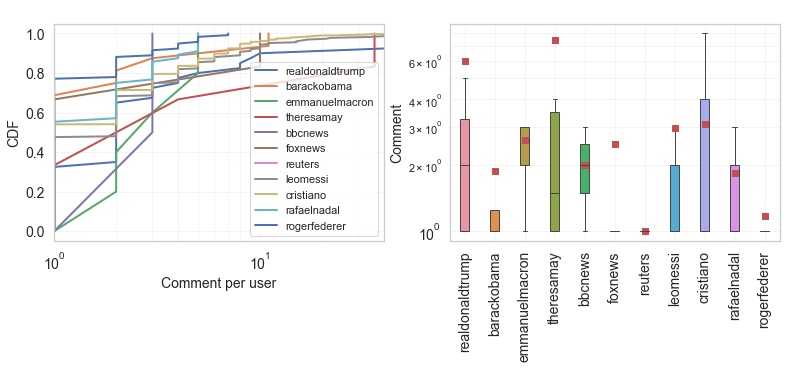

In [21]:
# total comment received by unique suers across usecase
def plot_0():
    
    def get_comment_per_user(_df):
        list_res = []
        for name, group in _df.groupby('owener_id'):
            list_res.append(group.shape[0])
        return list_res

    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,2, figsize=(13,4))
    
    ALL_DF = [df_comment_trump, df_comment_obama, df_comment_macron, df_comment_may,
              df_comment_bbc, df_comment_cnn, df_comment_foxnews, df_comment_reuters,
              df_comment_messi, df_comment_ronaldo, df_comment_nadal, df_comment_federer,
             ]
    
    counter = 0
    df_boxplot = pd.DataFrame()
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_comment_per_user(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes[0], legend=True, label=LIST_ALL_USERS[counter])
            
            
            data =  pd.DataFrame(get_comment_per_user(item))
            data.columns = ['comment']            
            df_boxplot[LIST_ALL_USERS[counter]] = data['comment']
            
        counter += 1

    ax.axes.set_xlim([1,40])
#     ax.axes.set_ylim([0.4,1.03])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Comment per user")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(14)
    
    

    #box plot
    boxplot = sns.boxplot( data=df_boxplot, showfliers=False, width= 0.3, linewidth=1, ax=axes[1])
    boxplot.plot(df_boxplot.mean(), 'rs')
    boxplot.grid(True, which='both', linestyle='-', alpha=0.2)
#     boxplot.set_xlabel("Clusters")
    boxplot.set_ylabel("Comment")
    boxplot.set_yscale('log')
    boxplot.set_title(" ")
    boxplot.xaxis.set_tick_params(rotation=90)
    
    for item in ([boxplot.title, boxplot.xaxis.label, boxplot.yaxis.label] + boxplot.get_xticklabels() + boxplot.get_yticklabels()): item.set_fontsize(14)
    
    plt.savefig("plot_MLearning12_P0.pdf", bbox_inches='tight')
    
plot_0()

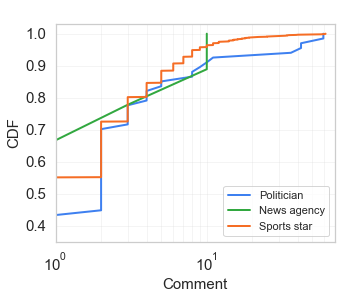

In [22]:
# total comment received by unique suers across usecase
def plot_0_1():
    
    def get_comment_per_user(_df):
        list_res = []
        for name, group in _df.groupby('owener_id'):
            list_res.append(group.shape[0])
        return list_res

    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_comment_politician, 
              df_comment_newsagency, 
              df_comment_sportstar
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_comment_per_user(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CATEGORIES[counter], c=COLORS_COMMUNITIES[counter])
            
        counter += 1

    ax.axes.set_xlim([1,70])
    ax.axes.set_ylim([0.35,1.03])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Comment")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
    
    plt.savefig("plot_MLearning12_P0_1.pdf", bbox_inches='tight')
    
plot_0_1()

In [62]:
# median comment per user
def get_comment_per_user(_df):
    list_res = []
    for name, group in _df.groupby('owener_id'):
        list_res.append(group.shape[0])
    return list_res

print(mean(get_comment_per_user(df_comment_politician)))
print(mean(get_comment_per_user(df_comment_newsagency)))
print(mean(get_comment_per_user(df_comment_sportstar)))

4.895522388059701
2.2222222222222223
2.8333333333333335


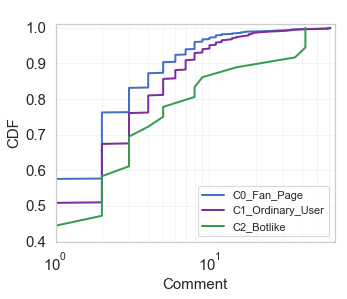

In [23]:
# comment issued by unique impersonaro across clusters
def plot_1():
    
    def get_comment_per_user(_df):
        list_res = []
        for name, group in _df.groupby('owener_id'):
            list_res.append(group.shape[0])
        return list_res

    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_c0_comments, 
              df_c1_comments, 
              df_c2_comments
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_comment_per_user(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CLUSTERS[counter], c=COLORS_CLUSTERS[counter])
            
        counter += 1

    ax.axes.set_xlim([1,65])
    ax.axes.set_ylim([0.4,1.01])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Comment")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
    
    plt.savefig("plot_MLearning12_P1.pdf", bbox_inches='tight')
    
plot_1()

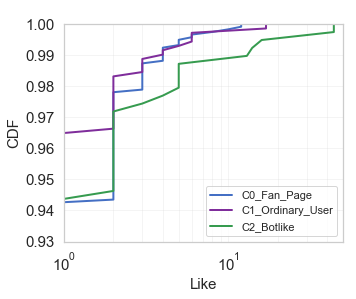

In [24]:
# comment issued by unique impersonaro across clusters
def plot_1_2():
    
    def get_comment_per_user(_df):
        list_res = []
        for name, group in _df.groupby('owener_id'):
            list_res.append(group.shape[0])
        return list_res

    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_c0_like, 
              df_c1_like, 
              df_c2_like
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_comment_per_user(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CLUSTERS[counter], c=COLORS_CLUSTERS[counter])
            
        counter += 1

    ax.axes.set_xlim([1,50])
    ax.axes.set_ylim([0.93,1.0])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Like")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
    
    plt.savefig("plot_MLearning12_P1_2.pdf", bbox_inches='tight')
    
plot_1_2()

In [63]:
# median comment per user
def get_comment_per_user(_df):
    list_res = []
    for name, group in _df.groupby('owener_id'):
        list_res.append(group.shape[0])
    return list_res

print(mean(get_comment_per_user(df_c0_like)))
print(mean(get_comment_per_user(df_c1_like)))
print(mean(get_comment_per_user(df_c2_like)))

1.1104553119730185
1.0869565217391304
1.2941176470588236


In [64]:
# median comment per user
def get_comment_per_user(_df):
    list_res = []
    for name, group in _df.groupby('owener_id'):
        list_res.append(group.shape[0])
    return list_res

print(mean(get_comment_per_user(df_c0_comments)))
print(mean(get_comment_per_user(df_c1_comments)))
print(mean(get_comment_per_user(df_c2_comments)))

2.5942327497425333
3.2256568778979906
5.916666666666667


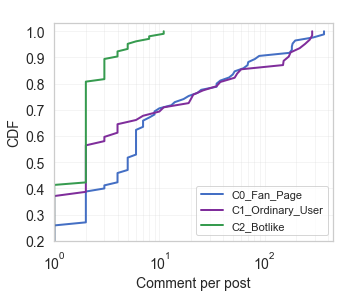

In [26]:
# 
def plot_2():
    
    def get_comment_per_post(_df):
        list_res = []
        for name, group in _df.groupby('comment_post_shortcode'):
            list_res.append(group.shape[0])
        return list_res
    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_c0_comments, 
              df_c1_comments, 
              df_c2_comments
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_comment_per_post(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CLUSTERS[counter], c=COLORS_CLUSTERS[counter])
            
        counter += 1

    ax.axes.set_xlim([1,450])
    ax.axes.set_ylim([0.2,1.03])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Comment per post")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(14)
    
    plt.savefig("plot_MLearning12_P2.pdf", bbox_inches='tight')
    
plot_2()

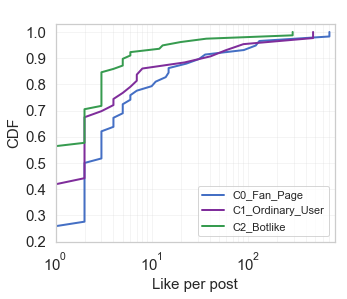

In [27]:
# 
def plot_2_2():
    
    def get_comment_per_post(_df):
        list_res = []
        for name, group in _df.groupby('like_post_shortcode'):
            list_res.append(group.shape[0])
        return list_res
    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_c0_like, 
              df_c1_like, 
              df_c2_like
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_comment_per_post(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CLUSTERS[counter], c=COLORS_CLUSTERS[counter])
            
        counter += 1

    ax.axes.set_xlim([1,800])
    ax.axes.set_ylim([0.2,1.03])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Like per post")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
    
    plt.savefig("plot_MLearning12_P2_2.pdf", bbox_inches='tight')
    
plot_2_2()

In [67]:
# median comment per user
def get_comment_per_post(_df):
    list_res = []
    for name, group in _df.groupby('comment_post_shortcode'):
        list_res.append(group.shape[0])
    return list_res


print(mean(get_comment_per_post(df_c0_comments)))
print(mean(get_comment_per_post(df_c1_comments)))
print(mean(get_comment_per_post(df_c2_comments)))

29.63529411764706
33.66129032258065
2.048076923076923


In [68]:
# median comment per user
def get_comment_per_post(_df):
    list_res = []
    for name, group in _df.groupby('like_post_shortcode'):
        list_res.append(group.shape[0])
    return list_res


print(mean(get_comment_per_post(df_c0_comments)))
print(mean(get_comment_per_post(df_c1_comments)))
print(mean(get_comment_per_post(df_c2_comments)))

125.95
260.875
19.363636363636363


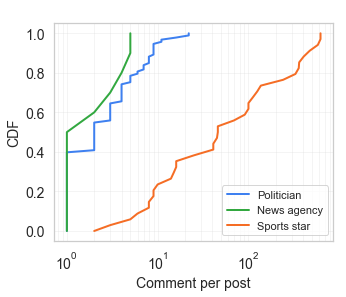

In [28]:
# 
def plot_2_3():
    
    def get_comment_per_post(_df):
        list_res = []
        for name, group in _df.groupby('comment_post_shortcode'):
            list_res.append(group.shape[0])
        return list_res
    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_comment_politician, 
              df_comment_newsagency, 
              df_comment_sportstar
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_comment_per_post(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CATEGORIES[counter], c=COLORS_COMMUNITIES[counter])
            
        counter += 1

#     ax.axes.set_xlim([1,450])
#     ax.axes.set_ylim([0.2,1.03])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Comment per post")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(14)
    
    plt.savefig("plot_MLearning12_P2_3.pdf", bbox_inches='tight')
    
plot_2_3()

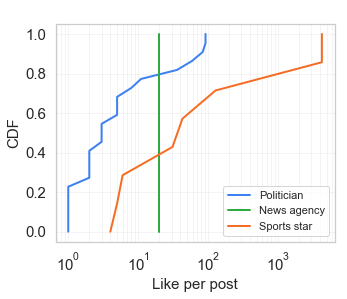

In [29]:
# 
def plot_2_4():
    
    def get_comment_per_post(_df):
        list_res = []
        for name, group in _df.groupby('like_post_shortcode'):
            list_res.append(group.shape[0])
        return list_res
    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_comment_politician, 
              df_comment_newsagency, 
              df_comment_sportstar
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_comment_per_post(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CATEGORIES[counter], c=COLORS_COMMUNITIES[counter])
            
        counter += 1

#     ax.axes.set_xlim([1,800])
#     ax.axes.set_ylim([0.2,1.03])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Like per post")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
    
    plt.savefig("plot_MLearning12_P2_4.pdf", bbox_inches='tight')
    
plot_2_4()

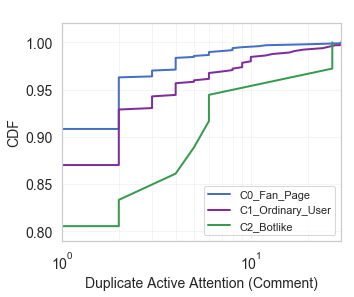

In [30]:
# 
def plot_3():
    
    def get_duplicate_count_per_impersonator(_df):
        list_res = []
        for name, group in _df.groupby('owener_id'):

            list_text = group['comment_text'].tolist()
            #find duplicated
            duplicated = Counter(list_text)

            dup = 0
            for item in duplicated:
                if duplicated[item] > 1:
                    dup += duplicated[item]

            list_res.append(dup)

        return list_res
    
    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_c0_comments, 
              df_c1_comments, 
              df_c2_comments
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_duplicate_count_per_impersonator(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CLUSTERS[counter], c=COLORS_CLUSTERS[counter])
            
        counter += 1

    ax.axes.set_xlim([1,30])
    ax.axes.set_ylim([0.79,1.02])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Duplicate Active Attention (Comment)")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(14)
    
    plt.savefig("plot_MLearning12_P3.pdf", bbox_inches='tight')
    
plot_3()

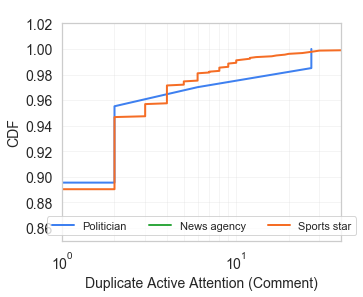

In [80]:
# 
def plot_3_1():
    
    def get_duplicate_count_per_impersonator(_df):
        list_res = []
        for name, group in _df.groupby('owener_id'):

            list_text = group['comment_text'].tolist()
            #find duplicated
            duplicated = Counter(list_text)

            dup = 0
            for item in duplicated:
                if duplicated[item] > 1:
                    dup += duplicated[item]

            list_res.append(dup)

        return list_res
    
    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_comment_politician, 
              df_comment_newsagency, 
              df_comment_sportstar
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_duplicate_count_per_impersonator(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CATEGORIES[counter], c=COLORS_COMMUNITIES[counter])
            
        counter += 1

    ax.axes.set_xlim([1,40])
    ax.axes.set_ylim([0.85,1.02])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Duplicate Active Attention (Comment)")
    ax.set_title(" ")
    ax.legend(frameon=True, loc='lower center', ncol=3)
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(14)
    
    plt.savefig("plot_MLearning12_P3_1.pdf", bbox_inches='tight')
    
plot_3_1()

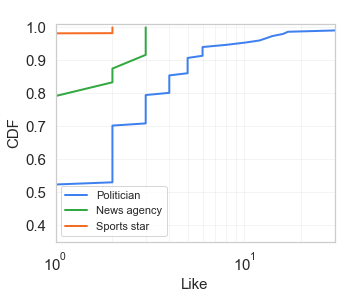

In [32]:
# total comment received by unique suers across usecase
def plot_4():
    
    def get_comment_per_user(_df):
        list_res = []
        for name, group in _df.groupby('owener_id'):
            list_res.append(group.shape[0])
        return list_res

    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_like_politician, 
              df_like_newsagency, 
              df_like_sportstar
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_comment_per_user(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CATEGORIES[counter], c=COLORS_COMMUNITIES[counter])
            
        counter += 1

    ax.axes.set_xlim([1,30])
    ax.axes.set_ylim([0.35,1.01])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Like")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
    
    plt.savefig("plot_MLearning12_P4.pdf", bbox_inches='tight')
    
plot_4()

In [61]:
# median
def get_comment_per_user(_df):
    list_res = []
    for name, group in _df.groupby('owener_id'):
        list_res.append(group.shape[0])
    return list_res


print(mean(get_comment_per_user(df_like_politician)))
print(mean(get_comment_per_user(df_like_newsagency)))
print(mean(get_comment_per_user(df_like_sportstar)))

2.7549668874172184
1.25
1.0174940898345153


comment age issued by impersonator across communities


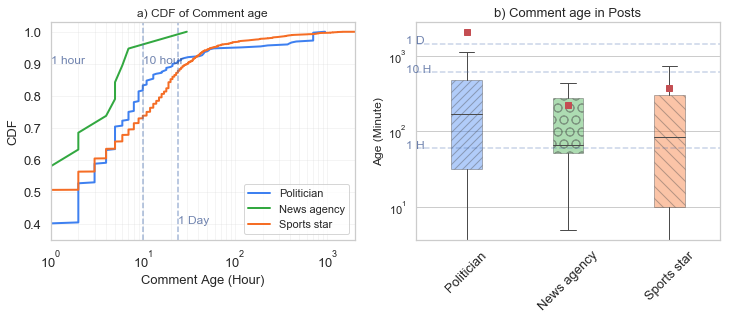

In [73]:
def plot_5():
    
    sns.set(style="whitegrid")
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
    
    ALL_DF_COMMENT = [
                    df_comment_politician, 
                          df_comment_newsagency, 
                          df_comment_sportstar
                 ]
    

    
    df_boxplot = pd.DataFrame()
    
    for j in range(len(ALL_DF_COMMENT)):
        _df = ALL_DF_COMMENT[j]
        if (_df.shape[0] != 0):
        
            list_imposter_all = _df['comment_age_sec']
            list_imposter_all = list(map(float, list_imposter_all))
            list_impostor_day = []
            list_impostor_min = []

            for i in list_imposter_all:
                # Obtain the total minutes
                totalMinutes = i // 60
                # Obtain the total hours
                totalHours = totalMinutes // 60
            #     sec = timedelta(seconds=i)
                totalday = totalHours // 24
                list_impostor_min.append(totalMinutes)
                list_impostor_day.append(totalHours)

            datam2 =  pd.DataFrame(list_impostor_min)
            datam2.columns = ['period']
            
            data =  pd.DataFrame(list_impostor_day)
            data.columns = ['period']
            
            ser = data[['period']].copy()
            ser = ser.sort_values(by='period')
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser)
        #     ser_cdf.index.name = "Comment Age (hour)"    
            ax5 = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label=LIST_CATEGORIES[j], c=COLORS_COMMUNITIES[j])
            
            df_boxplot[LIST_CATEGORIES[j]] = datam2['period']


    ax5.axes.set_xlim([1,2000])
    ax5.axes.set_ylim([0.35, 1.03])
    
    for item in ([ax5.title, ax5.xaxis.label, ax5.yaxis.label] + ax5.get_xticklabels() + ax5.get_yticklabels()): item.set_fontsize(13)

    ax5.set_ylabel("CDF")
    ax5.set_xlabel("Comment Age (Hour)")
    
    ax5.set_title("a) CDF of Comment age")
    
    ax5.axvline(x=1, linestyle='dashed', alpha=0.5)
    ax5.text(x=1, y=0.9, s='1 hour', alpha=0.7, color='#334f8d')

    ax5.axvline(x=10, linestyle='dashed', alpha=0.5)
    ax5.text(x=10, y=0.9, s='10 hour', alpha=0.7, color='#334f8d')
    
    ax5.axvline(x=24, linestyle='dashed', alpha=0.5)
    ax5.text(x=24, y=0.4, s='1 Day', alpha=0.7, color='#334f8d')
    
#     ax5.axvline(x=48, linestyle='dashed', alpha=0.5)
#     ax5.text(x=42, y=0.4, s='2 Days', alpha=0.7, color='#334f8d')
    ax5.grid(True, which='both', linestyle='-', alpha=0.2)
    
    

    #box plot
    boxplot2 = sns.boxplot( data=df_boxplot, showfliers=False, width= 0.3, linewidth=1, ax=ax2)
    boxplot2.plot(df_boxplot.mean(), 'rs')
#     boxplot2.set_xlabel("Clusters")
    boxplot2.set_ylabel("Age (Minute)")
    boxplot2.set_yscale('log')
    boxplot2.set_title("b) Comment age in Posts")
    boxplot2.xaxis.set_tick_params(rotation=45)
    
    
    for j in range(len(df_boxplot.columns)):
        mybox = boxplot2.artists[j]
        mybox.set_facecolor(COLORS_COMMUNITIES[j])
        mybox.set_alpha(0.4)
        mybox.set(hatch = LIST_PLOT_PATTERN[j])
        
    
    
    boxplot2.axhline(60, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=60, x=-0.6, s='1 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(600, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=600, x=-0.6, s='10 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(1440, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=1440, x=-0.6, s='1 D', alpha=0.7, color='#334f8d')
    
    for item in ([boxplot2.title] + boxplot2.get_xticklabels()): item.set_fontsize(13)
    
    plt.savefig("plot_MLearning13_P5.pdf", bbox_inches='tight')
    
    print("comment age issued by impersonator across communities")
    
plot_5()

comment age issued by impersonator across communities
Politician     170.5
News agency     65.5
Sports star     83.5
dtype: float64


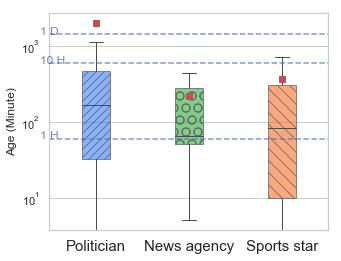

In [71]:
def plot_5_1():
    
    sns.set(style="whitegrid")
    
    fig, ax2 = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF_COMMENT = [
                    df_comment_politician, 
                          df_comment_newsagency, 
                          df_comment_sportstar
                 ]
    

    
    df_boxplot = pd.DataFrame()
    
    for j in range(len(ALL_DF_COMMENT)):
        _df = ALL_DF_COMMENT[j]
        if (_df.shape[0] != 0):
        
            list_imposter_all = _df['comment_age_sec']
            list_imposter_all = list(map(float, list_imposter_all))
            list_impostor_day = []
            list_impostor_min = []

            for i in list_imposter_all:
                # Obtain the total minutes
                totalMinutes = i // 60
                # Obtain the total hours
                totalHours = totalMinutes // 60
            #     sec = timedelta(seconds=i)
                totalday = totalHours // 24
                list_impostor_min.append(totalMinutes)
                list_impostor_day.append(totalHours)

            datam2 =  pd.DataFrame(list_impostor_min)
            datam2.columns = ['period']
            
            data =  pd.DataFrame(list_impostor_day)
            data.columns = ['period']

            df_boxplot[LIST_CATEGORIES[j]] = datam2['period']


    #box plot
    boxplot2 = sns.boxplot( data=df_boxplot, orient="v", showfliers=False, width= 0.3, linewidth=1, ax=ax2)
    boxplot2.plot(df_boxplot.mean(), 'rs')
#     boxplot2.set_xlabel("Clusters")
    boxplot2.set_ylabel("Age (Minute)")
    boxplot2.set_yscale('log')
#     boxplot2.set_title("b) Comment age in Posts")
#     boxplot2.xaxis.set_tick_params(rotation=-45)
    
    
    for j in range(len(df_boxplot.columns)):
        mybox = boxplot2.artists[j]
        mybox.set_facecolor(COLORS_COMMUNITIES[j])
        mybox.set_alpha(0.6)
        mybox.set(hatch = LIST_PLOT_PATTERN[j])
        
    
    
    boxplot2.axhline(60, linestyle='dashed', alpha=0.7)
    boxplot2.text(y=60, x=-0.6, s='1 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(600, linestyle='dashed', alpha=0.7)
    boxplot2.text(y=600, x=-0.6, s='10 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(1440, linestyle='dashed', alpha=0.7)
    boxplot2.text(y=1440, x=-0.6, s='1 D', alpha=0.7, color='#334f8d')
    
    for item in ([boxplot2.title] + boxplot2.get_xticklabels()): item.set_fontsize(15)
    
    plt.savefig("plot_MLearning13_P5_1.pdf", bbox_inches='tight')
    
    print("comment age issued by impersonator across communities")
    
    print(df_boxplot.median())
    
plot_5_1()

In [35]:
def get_duplicate_df(_df):
    list_res = []

    _df['comment_text_is_duplicated']= _df.duplicated(subset=['comment_text'], keep=False)
    dup = _df[_df['comment_text_is_duplicated'] == True]
    nondup = _df[_df['comment_text_is_duplicated'] == False]

    return dup, nondup

c0_dup, c0_nondup = get_duplicate_df(df_c0_comments)
c1_dup, c1_nondup = get_duplicate_df(df_c1_comments)
c2_dup, c2_nondup = get_duplicate_df(df_c2_comments)

In [36]:
c0_dup.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'username', 'name', 'bio', 'photo',
       'nfollower', 'nfollowee', 'nmediacount', 'follower', 'followee',
       'mediacount', 'private', 'verified', 'lcm', 'mcm', 'nmcm', 'class',
       'class BGM 3', 'class GM 3', 'class kmeans 3', 'class spectral 3',
       'class GM 4', 'owener_id', 'combined_owener_external_url',
       'combined_username', 'combined_full_name', 'combined_profile_pic_url',
       'combined_biography', 'combined_similarity_photo_comment',
       'combined_similarity_photo_like', 'comment_created_at', 'comment_id',
       'comment_post_shortcode', 'comment_shortcode_username', 'comment_text',
       'comment_total', 'like_total', 'like_shortcode_username',
       'like_post_shortcode', 'like_id', 'comment_post_date',
       'comment_avg_age_sec', 'comment_age_sec', 'community', 'cluster',
       'comment_text_is_duplicated'],
      dtype='object')

In [74]:
df_c2_comments['comment_text'].head()

0    I'M WITH YOU, I WILL FIGHT FOR YOU, AND I WILL...
1    It doesn't get better than President Trump! TR...
2                       keeping our country safer 🇺🇸🇺🇸
3          Wonderful and amazing and beautiful 🇺🇸🇺🇸😍😍😍
4    If you don't have borders, you don't have a CO...
Name: comment_text, dtype: object

In [38]:
a = [1,1,1,1,2,2,2,2,3,3,4,5,5]
counter=collections.Counter(a)
print(counter)
for i in counter:
    if (counter[i] > 1):
        print(counter[i])

Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})
4
4
2
2


In [39]:
# for name, group in c0_dup.groupby('owener_id'):
    
#     group['comment_text_is_duplicated']= group.duplicated(subset=['comment_text'], keep=False)
#     print(group['comment_age_sec'])

#     counter = collections.Counter(group['comment_age_sec'])
#     _sum = 0
#     for i in counter:
#         if (counter[i] > 1):
#             _sum += counter[i]
    
#     print(_sum)
#     print("--------")

In [40]:
# c0_dup['comment_diff'] = c0_dup['comment_post_date'] - c0_dup['comment_created_at']
c0_dup[['owener_id', 'comment_text', 'comment_created_at', 'comment_post_date', 'comment_age_sec']].head()

owener_id                                       comment_text  \
0     14227465                                                 ❤️   
8   1550257529                                             ❤️❤️❤️   
13  6062061835                                             ❤️❤️❤️   
14  6062061835                                                 😘😘   
84  2372350489  I post trump memes every day! Check out my pag...   

     comment_created_at    comment_post_date  comment_age_sec  
0   2018-11-29 19:31:24  2018-11-29 14:16:09          18915.0  
8   2018-10-25 20:51:18  2018-10-25 20:49:14            124.0  
13  2018-10-26 19:02:29  2018-10-26 19:01:08             81.0  
14  2018-10-26 19:02:30  2018-10-26 19:01:08             82.0  
84  2018-10-15 20:20:28  2018-10-14 18:07:28          94380.0

comment age issued by impersonator across communities (duplcated vs non-duplicated)


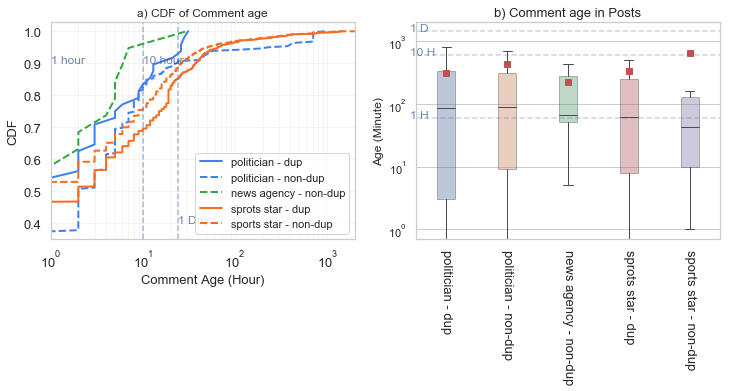

In [41]:
# 
def plot_6():
    
    sns.set(style="whitegrid")
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
    
    def get_duplicate_df(_df):
        list_res = []

        _df['comment_text_is_duplicated']= _df.duplicated(subset=['comment_text'], keep=False)
        dup = _df[_df['comment_text_is_duplicated'] == True]
        nondup = _df[_df['comment_text_is_duplicated'] == False]

        return dup, nondup
    
    politician_dup, politician_nondup = get_duplicate_df(df_comment_politician)
    newsagency_dup, newsagency_nondup = get_duplicate_df(df_comment_newsagency)
    sportstars_dup, sportstars_nondup = get_duplicate_df(df_comment_sportstar)
    
    
    ALL_DF_COMMENT = [
                    politician_dup, politician_nondup, 
                    newsagency_dup, newsagency_nondup, 
                    sportstars_dup, sportstars_nondup
                 ]
    
    COLOR_DUP_NDUP = [
                COLOR_POLITICIAN, COLOR_POLITICIAN,
              COLOR_NEWSAGENCY, COLOR_NEWSAGENCY,
              COLOR_SPORTSARTS, COLOR_SPORTSARTS,
    ]
    
    
    IMP_NAME = ['politician - dup', 'politician - non-dup', 
                'news agency - dup', 'news agency - non-dup',
                'sprots star - dup', 'sports star - non-dup',
                  ]
    
    INF_LINE = [ '-', '--',
                    '-', '--',
                    '-', '--',
                    '-', '--',
                   ]

    
    df_boxplot = pd.DataFrame()
    
    for j in range(len(ALL_DF_COMMENT)):
        _df = ALL_DF_COMMENT[j]
        if (_df.shape[0] != 0):
        
            list_imposter_all = _df['comment_age_sec']
            list_imposter_all = list(map(float, list_imposter_all))
            list_impostor_day = []
            list_impostor_min = []

            for i in list_imposter_all:
                # Obtain the total minutes
                totalMinutes = i // 60
                # Obtain the total hours
                totalHours = totalMinutes // 60
            #     sec = timedelta(seconds=i)
                totalday = totalHours // 24
                list_impostor_min.append(totalMinutes)
                list_impostor_day.append(totalHours)

            datam2 =  pd.DataFrame(list_impostor_min)
            datam2.columns = ['period']
            
            data =  pd.DataFrame(list_impostor_day)
            data.columns = ['period']
            
            ser = data[['period']].copy()
            ser = ser.sort_values(by='period')
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser)
        #     ser_cdf.index.name = "Comment Age (hour)"    
            ax5 = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label=IMP_NAME[j], c=COLOR_DUP_NDUP[j], linestyle=INF_LINE[j])
            
            df_boxplot[IMP_NAME[j]] = datam2['period']


    ax5.axes.set_xlim([1,2000])
    ax5.axes.set_ylim([0.35, 1.03])
    
    for item in ([ax5.title, ax5.xaxis.label, ax5.yaxis.label] + ax5.get_xticklabels() + ax5.get_yticklabels()): item.set_fontsize(13)

    ax5.set_ylabel("CDF")
    ax5.set_xlabel("Comment Age (Hour)")
    
    ax5.set_title("a) CDF of Comment age")
    
    ax5.axvline(x=1, linestyle='dashed', alpha=0.5)
    ax5.text(x=1, y=0.9, s='1 hour', alpha=0.7, color='#334f8d')

    ax5.axvline(x=10, linestyle='dashed', alpha=0.5)
    ax5.text(x=10, y=0.9, s='10 hour', alpha=0.7, color='#334f8d')
    
    ax5.axvline(x=24, linestyle='dashed', alpha=0.5)
    ax5.text(x=24, y=0.4, s='1 Day', alpha=0.7, color='#334f8d')
    
#     ax5.axvline(x=48, linestyle='dashed', alpha=0.5)
#     ax5.text(x=42, y=0.4, s='2 Days', alpha=0.7, color='#334f8d')
    ax5.grid(True, which='both', linestyle='-', alpha=0.2)
    
    

    #box plot
    boxplot2 = sns.boxplot( data=df_boxplot, showfliers=False, width= 0.3, linewidth=1, ax=ax2)
    boxplot2.plot(df_boxplot.mean(), 'rs')
#     boxplot2.set_xlabel("Clusters")
    boxplot2.set_ylabel("Age (Minute)")
    boxplot2.set_yscale('log')
    boxplot2.set_title("b) Comment age in Posts")
    boxplot2.xaxis.set_tick_params(rotation=-90)
    
    
    for j in range(len(df_boxplot.columns)):
        mybox = boxplot2.artists[j]
#         mybox.set_facecolor(COLOR_DUP_NDUP[j])
        mybox.set_alpha(0.4)
#         mybox.set(hatch = LIST_PLOT_PATTERN[j])
        
    
    
    boxplot2.axhline(60, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=60, x=-0.6, s='1 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(600, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=600, x=-0.6, s='10 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(1440, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=1440, x=-0.6, s='1 D', alpha=0.7, color='#334f8d')
    
    for item in ([boxplot2.title] + boxplot2.get_xticklabels()): item.set_fontsize(13)
    
    plt.savefig("plot_MLearning13_P6.pdf", bbox_inches='tight')
    
    print("comment age issued by impersonator across communities (duplcated vs non-duplicated)")
    
plot_6()

comment age issued by impersonator across communities (duplcated vs non-duplicated)


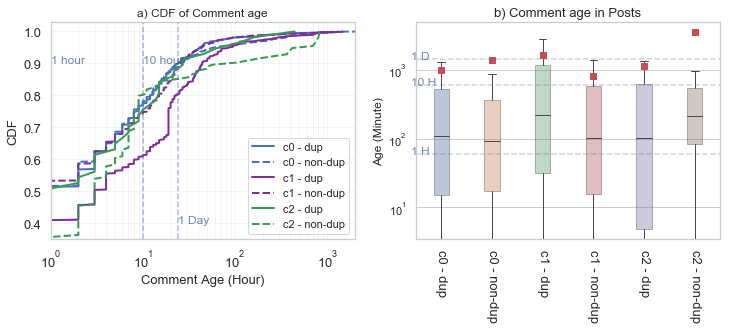

In [42]:
# 
def plot_6_1():
    
    sns.set(style="whitegrid")
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
    
    def get_duplicate_df(_df):
        list_res = []

        _df['comment_text_is_duplicated']= _df.duplicated(subset=['comment_text'], keep=False)
        dup = _df[_df['comment_text_is_duplicated'] == True]
        nondup = _df[_df['comment_text_is_duplicated'] == False]

        return dup, nondup
    
    c0_dup, c0_nondup = get_duplicate_df(df_c0_comments)
    c1_dup, c1_nondup = get_duplicate_df(df_c1_comments)
    c2_dup, c2_nondup = get_duplicate_df(df_c2_comments)
    
    
    ALL_DF_COMMENT = [
                    c0_dup, c0_nondup, 
                    c1_dup, c1_nondup, 
                    c2_dup, c2_nondup
                 ]
    
    COLOR_DUP_NDUP = [
                COLOR_C0, COLOR_C0,
              COLOR_C1, COLOR_C1,
              COLOR_C2, COLOR_C2,
    ]
    
    
    IMP_NAME = ['c0 - dup', 'c0 - non-dup', 
                'c1 - dup', 'c1 - non-dup',
                'c2 - dup', 'c2 - non-dup',
                  ]
    
    INF_LINE = [ '-', '--',
                    '-', '--',
                    '-', '--',
                    '-', '--',
                   ]

    
    df_boxplot = pd.DataFrame()
    
    for j in range(len(ALL_DF_COMMENT)):
        _df = ALL_DF_COMMENT[j]
        if (_df.shape[0] != 0):
        
            list_imposter_all = _df['comment_age_sec']
            list_imposter_all = list(map(float, list_imposter_all))
            list_impostor_day = []
            list_impostor_min = []

            for i in list_imposter_all:
                # Obtain the total minutes
                totalMinutes = i // 60
                # Obtain the total hours
                totalHours = totalMinutes // 60
            #     sec = timedelta(seconds=i)
                totalday = totalHours // 24
                list_impostor_min.append(totalMinutes)
                list_impostor_day.append(totalHours)

            datam2 =  pd.DataFrame(list_impostor_min)
            datam2.columns = ['period']
            
            data =  pd.DataFrame(list_impostor_day)
            data.columns = ['period']
            
            ser = data[['period']].copy()
            ser = ser.sort_values(by='period')
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser)
        #     ser_cdf.index.name = "Comment Age (hour)"    
            ax5 = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label=IMP_NAME[j], c=COLOR_DUP_NDUP[j], linestyle=INF_LINE[j])
            
            df_boxplot[IMP_NAME[j]] = datam2['period']


    ax5.axes.set_xlim([1,2000])
    ax5.axes.set_ylim([0.35, 1.03])
    
    for item in ([ax5.title, ax5.xaxis.label, ax5.yaxis.label] + ax5.get_xticklabels() + ax5.get_yticklabels()): item.set_fontsize(13)

    ax5.set_ylabel("CDF")
    ax5.set_xlabel("Comment Age (Hour)")
    
    ax5.set_title("a) CDF of Comment age")
    
    ax5.axvline(x=1, linestyle='dashed', alpha=0.5)
    ax5.text(x=1, y=0.9, s='1 hour', alpha=0.7, color='#334f8d')

    ax5.axvline(x=10, linestyle='dashed', alpha=0.5)
    ax5.text(x=10, y=0.9, s='10 hour', alpha=0.7, color='#334f8d')
    
    ax5.axvline(x=24, linestyle='dashed', alpha=0.5)
    ax5.text(x=24, y=0.4, s='1 Day', alpha=0.7, color='#334f8d')
    
#     ax5.axvline(x=48, linestyle='dashed', alpha=0.5)
#     ax5.text(x=42, y=0.4, s='2 Days', alpha=0.7, color='#334f8d')
    ax5.grid(True, which='both', linestyle='-', alpha=0.2)
    
    

    #box plot
    boxplot2 = sns.boxplot( data=df_boxplot, showfliers=False, width= 0.3, linewidth=1, ax=ax2)
    boxplot2.plot(df_boxplot.mean(), 'rs')
#     boxplot2.set_xlabel("Clusters")
    boxplot2.set_ylabel("Age (Minute)")
    boxplot2.set_yscale('log')
    boxplot2.set_title("b) Comment age in Posts")
    boxplot2.xaxis.set_tick_params(rotation=-90)
    
    
    for j in range(len(df_boxplot.columns)):
        mybox = boxplot2.artists[j]
#         mybox.set_facecolor(COLOR_DUP_NDUP[j])
        mybox.set_alpha(0.4)
#         mybox.set(hatch = LIST_PLOT_PATTERN[j])
        
    
    
    boxplot2.axhline(60, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=60, x=-0.6, s='1 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(600, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=600, x=-0.6, s='10 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(1440, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=1440, x=-0.6, s='1 D', alpha=0.7, color='#334f8d')
    
    for item in ([boxplot2.title] + boxplot2.get_xticklabels()): item.set_fontsize(13)
    
    plt.savefig("plot_MLearning13_P6_1.pdf", bbox_inches='tight')
    
    print("comment age issued by impersonator across communities (duplcated vs non-duplicated)")
    
plot_6_1()

comment age issued by impersonator across clusters


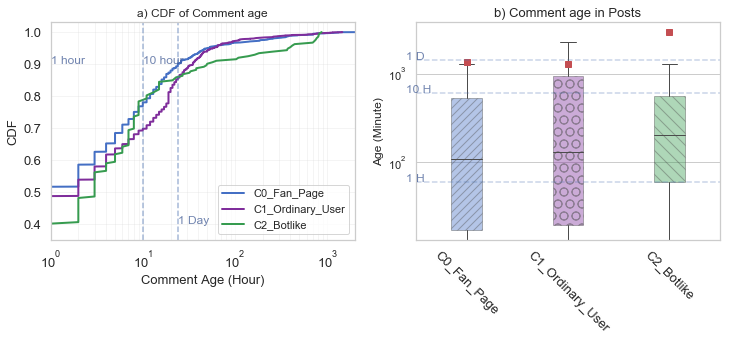

In [43]:
def plot_7():
    
    sns.set(style="whitegrid")
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
    
    ALL_DF_COMMENT = [
                    df_c0_comments, 
                          df_c1_comments, 
                          df_c2_comments
                 ]
    

    
    df_boxplot = pd.DataFrame()
    
    for j in range(len(ALL_DF_COMMENT)):
        _df = ALL_DF_COMMENT[j]
        if (_df.shape[0] != 0):
        
            list_imposter_all = _df['comment_age_sec']
            list_imposter_all = list(map(float, list_imposter_all))
            list_impostor_day = []
            list_impostor_min = []

            for i in list_imposter_all:
                # Obtain the total minutes
                totalMinutes = i // 60
                # Obtain the total hours
                totalHours = totalMinutes // 60
            #     sec = timedelta(seconds=i)
                totalday = totalHours // 24
                list_impostor_min.append(totalMinutes)
                list_impostor_day.append(totalHours)

            datam2 =  pd.DataFrame(list_impostor_min)
            datam2.columns = ['period']
            
            data =  pd.DataFrame(list_impostor_day)
            data.columns = ['period']
            
            ser = data[['period']].copy()
            ser = ser.sort_values(by='period')
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser)
        #     ser_cdf.index.name = "Comment Age (hour)"    
            ax5 = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label=LIST_CLUSTERS[j], c=COLORS_CLUSTERS[j])
            
            df_boxplot[LIST_CLUSTERS[j]] = datam2['period']


    ax5.axes.set_xlim([1,2000])
    ax5.axes.set_ylim([0.35, 1.03])
    
    for item in ([ax5.title, ax5.xaxis.label, ax5.yaxis.label] + ax5.get_xticklabels() + ax5.get_yticklabels()): item.set_fontsize(13)

    ax5.set_ylabel("CDF")
    ax5.set_xlabel("Comment Age (Hour)")
    
    ax5.set_title("a) CDF of Comment age")
    
    ax5.axvline(x=1, linestyle='dashed', alpha=0.5)
    ax5.text(x=1, y=0.9, s='1 hour', alpha=0.7, color='#334f8d')

    ax5.axvline(x=10, linestyle='dashed', alpha=0.5)
    ax5.text(x=10, y=0.9, s='10 hour', alpha=0.7, color='#334f8d')
    
    ax5.axvline(x=24, linestyle='dashed', alpha=0.5)
    ax5.text(x=24, y=0.4, s='1 Day', alpha=0.7, color='#334f8d')
    
#     ax5.axvline(x=48, linestyle='dashed', alpha=0.5)
#     ax5.text(x=42, y=0.4, s='2 Days', alpha=0.7, color='#334f8d')
    ax5.grid(True, which='both', linestyle='-', alpha=0.2)
    
    

    #box plot
    boxplot2 = sns.boxplot( data=df_boxplot, showfliers=False, width= 0.3, linewidth=1, ax=ax2)
    boxplot2.plot(df_boxplot.mean(), 'rs')
#     boxplot2.set_xlabel("Clusters")
    boxplot2.set_ylabel("Age (Minute)")
    boxplot2.set_yscale('log')
    boxplot2.set_title("b) Comment age in Posts")
    boxplot2.xaxis.set_tick_params(rotation=-45)
    
    
    for j in range(len(df_boxplot.columns)):
        mybox = boxplot2.artists[j]
        mybox.set_facecolor(COLORS_CLUSTERS[j])
        mybox.set_alpha(0.4)
        mybox.set(hatch = LIST_PLOT_PATTERN[j])
        
    
    
    boxplot2.axhline(60, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=60, x=-0.6, s='1 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(600, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=600, x=-0.6, s='10 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(1440, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=1440, x=-0.6, s='1 D', alpha=0.7, color='#334f8d')
    
    for item in ([boxplot2.title] + boxplot2.get_xticklabels()): item.set_fontsize(13)
    
    plt.savefig("plot_MLearning13_P7.pdf", bbox_inches='tight')
    
    print("comment age issued by impersonator across clusters")
    
plot_7()

comment age issued by impersonator across clusters
C0_Fan_Page         108.0
C1_Ordinary_User    130.0
C2_Botlike          203.0
dtype: float64


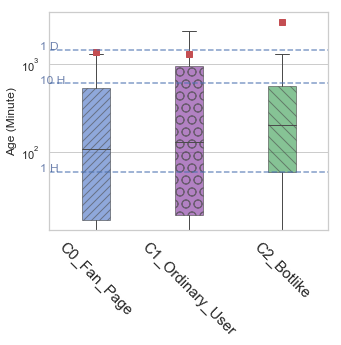

In [75]:
def plot_7_1():
    
    sns.set(style="whitegrid")
    
    fig, ax2 = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF_COMMENT = [
                    df_c0_comments, 
                          df_c1_comments, 
                          df_c2_comments
                 ]
    

    
    df_boxplot = pd.DataFrame()
    
    for j in range(len(ALL_DF_COMMENT)):
        _df = ALL_DF_COMMENT[j]
        if (_df.shape[0] != 0):
        
            list_imposter_all = _df['comment_age_sec']
            list_imposter_all = list(map(float, list_imposter_all))
            list_impostor_day = []
            list_impostor_min = []

            for i in list_imposter_all:
                # Obtain the total minutes
                totalMinutes = i // 60
                # Obtain the total hours
                totalHours = totalMinutes // 60
            #     sec = timedelta(seconds=i)
                totalday = totalHours // 24
                list_impostor_min.append(totalMinutes)
                list_impostor_day.append(totalHours)

            datam2 =  pd.DataFrame(list_impostor_min)
            datam2.columns = ['period']
            
            data =  pd.DataFrame(list_impostor_day)
            data.columns = ['period']
            
            df_boxplot[LIST_CLUSTERS[j]] = datam2['period']


    #box plot
    boxplot2 = sns.boxplot( data=df_boxplot, showfliers=False, width= 0.3, linewidth=1, ax=ax2)
    boxplot2.plot(df_boxplot.mean(), 'rs')
#     boxplot2.set_xlabel("Clusters")
    boxplot2.set_ylabel("Age (Minute)")
    boxplot2.set_yscale('log')
#     boxplot2.set_title("b) Comment age in Posts")
    boxplot2.xaxis.set_tick_params(rotation=-45)
    
    
    for j in range(len(df_boxplot.columns)):
        mybox = boxplot2.artists[j]
        mybox.set_facecolor(COLORS_CLUSTERS[j])
        mybox.set_alpha(0.6)
        mybox.set(hatch = LIST_PLOT_PATTERN[j])
        
    
    
    boxplot2.axhline(60, linestyle='dashed', alpha=0.7)
    boxplot2.text(y=60, x=-0.6, s='1 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(600, linestyle='dashed', alpha=0.7)
    boxplot2.text(y=600, x=-0.6, s='10 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(1440, linestyle='dashed', alpha=0.7)
    boxplot2.text(y=1440, x=-0.6, s='1 D', alpha=0.7, color='#334f8d')
    
    for item in ([boxplot2.title] + boxplot2.get_xticklabels()): item.set_fontsize(15)
    
    plt.savefig("plot_MLearning13_P7_1.pdf", bbox_inches='tight')
    
    print("comment age issued by impersonator across clusters")
    
    print(df_boxplot.median())
    
plot_7_1()

# Text analysis

In [45]:
def clean_text(_row):
    
    # Load the regular expression library
    import re
    
    text = _row['comment_text']
    
    text = re.sub(r'http\S+', '', text) # remove http links
    text = re.sub(r'bit.ly/\S+', '', text) # rempve bitly links
    text = text.strip('[link]') # remove [links]
    text = re.sub('\S*@\S*\s?', '', text)  # remove emails
    text = re.sub('\s+', ' ', text)  # remove newline chars
    text = re.sub("\'", "", text)  # remove single quotes

    #emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove punctuation
    text = re.sub('[,\.!?]', '', text)

    # Convert the titles to lowercase
    text = text.lower()

    _row['comment_text_clean'] = text
        
    return _row


df_c0_comments = df_c0_comments.apply(clean_text, axis=1)
df_c1_comments = df_c1_comments.apply(clean_text, axis=1)
df_c2_comments = df_c2_comments.apply(clean_text, axis=1)


df_comment_politician = df_comment_politician.apply(clean_text, axis=1)
df_comment_newsagency = df_comment_newsagency.apply(clean_text, axis=1)
df_comment_sportstar = df_comment_sportstar.apply(clean_text, axis=1)

df_comments = df_comments.apply(clean_text, axis=1)

# Wordcloud of all cooment - 

In [46]:
# Import the wordcloud library
from wordcloud import WordCloud

def get_wordcloud_plot(_df):

    # Join the different processed titles together.
    long_string = ','.join(list(_df['comment_text_clean'].values))

    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

    # Generate a word cloud
    wordcloud.generate(long_string)

    # Visualize the word cloud
    return wordcloud.to_image()


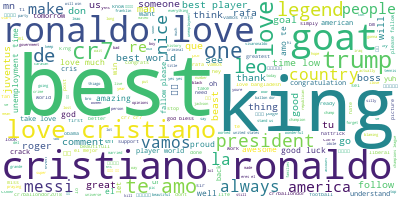

In [47]:
get_wordcloud_plot(df_c0_comments)

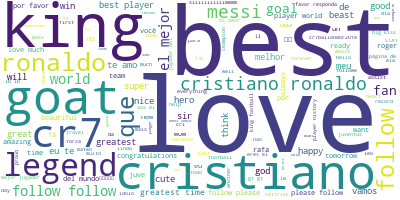

In [48]:
get_wordcloud_plot(df_c1_comments)

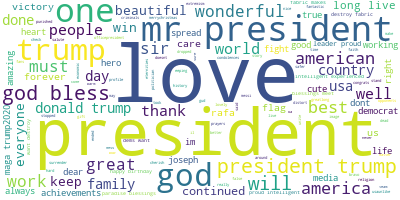

In [49]:
get_wordcloud_plot(df_c2_comments)

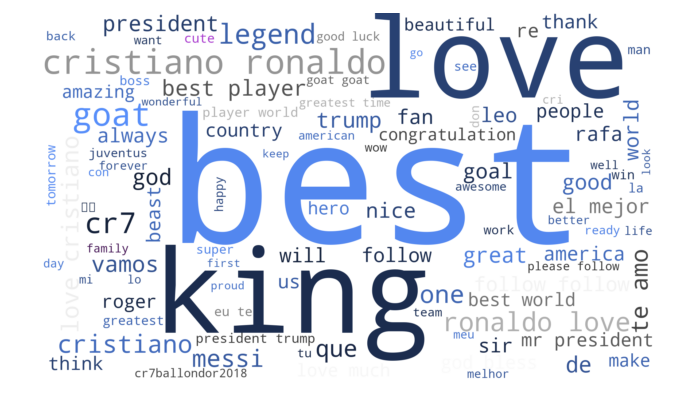

In [50]:
from wordcloud import (WordCloud, get_single_color_func)

def plot_8():
    
    class SimpleGroupedColorFunc(object):
        def __init__(self, color_to_words, default_color):
            self.word_to_color = {word: color
                                  for (color, words) in color_to_words.items()
                                  for word in words}

            self.default_color = default_color

        def __call__(self, word, **kwargs):
            return self.word_to_color.get(word, self.default_color)


    class GroupedColorFunc(object):

        def __init__(self, color_to_words, default_color):
            self.color_func_to_words = [
                (get_single_color_func(color), set(words))
                for (color, words) in color_to_words.items()]

            self.default_color_func = get_single_color_func(default_color)

        def get_color_func(self, word):
            """Returns a single_color_func associated with the word"""
            try:
                color_func = next(
                    color_func for (color_func, words) in self.color_func_to_words
                    if word in words)
            except StopIteration:
                color_func = self.default_color_func

            return color_func

        def __call__(self, word, **kwargs):
            return self.get_color_func(word)(word, **kwargs)

    long_string = ','.join(list(df_comments['comment_text_clean'].values))
    df_0_text = ','.join(list(df_c0_comments['comment_text_clean'].values)).split()
    df_1_text = ','.join(list(df_c1_comments['comment_text_clean'].values)).split()
    df_2_text = ','.join(list(df_c2_comments['comment_text_clean'].values)).split()

    # Since the text is small collocations are turned off and text is lower-cased
    wc = WordCloud(background_color="white", width = 2000, height = 1200, max_words=100, contour_width=3, collocations=True).generate(long_string)

    color_to_words = {
        COLOR_C0: df_0_text,
        COLOR_C1: df_1_text,
        COLOR_C2: df_2_text,
    }

    default_color = 'grey'

    # Create a color function with multiple tones
    grouped_color_func = GroupedColorFunc(color_to_words, default_color)

    # Apply our color function
    wc.recolor(color_func=grouped_color_func)
    # Plot
    plt.figure(figsize=[11,8])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
#     plt.show()

    plt.savefig('plot_MLearning13_P8.pdf',bbox_inches='tight',pad_inches=0.1)
    
plot_8()

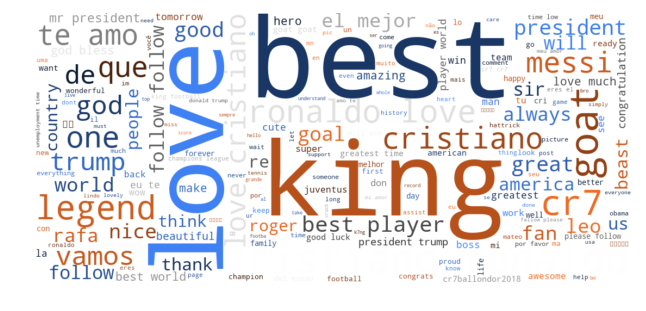

In [51]:
from wordcloud import (WordCloud, get_single_color_func)

def plot_9():
    
    class SimpleGroupedColorFunc(object):
        def __init__(self, color_to_words, default_color):
            self.word_to_color = {word: color
                                  for (color, words) in color_to_words.items()
                                  for word in words}

            self.default_color = default_color

        def __call__(self, word, **kwargs):
            return self.word_to_color.get(word, self.default_color)


    class GroupedColorFunc(object):

        def __init__(self, color_to_words, default_color):
            self.color_func_to_words = [
                (get_single_color_func(color), set(words))
                for (color, words) in color_to_words.items()]

            self.default_color_func = get_single_color_func(default_color)

        def get_color_func(self, word):
            """Returns a single_color_func associated with the word"""
            try:
                color_func = next(
                    color_func for (color_func, words) in self.color_func_to_words
                    if word in words)
            except StopIteration:
                color_func = self.default_color_func

            return color_func

        def __call__(self, word, **kwargs):
            return self.get_color_func(word)(word, **kwargs)

    long_string = ','.join(list(df_comments['comment_text_clean'].values))
#     df_0_text = ','.join(list(df_c0_comments['comment_text_clean'].values)).split()
#     df_1_text = ','.join(list(df_c1_comments['comment_text_clean'].values)).split()
#     df_2_text = ','.join(list(df_c2_comments['comment_text_clean'].values)).split()

    df_politician = ','.join(list(df_comment_politician['comment_text_clean'].values)).split()
    df_newsagency = ','.join(list(df_comment_newsagency['comment_text_clean'].values)).split()
    df_sportsstar = ','.join(list(df_comment_sportstar['comment_text_clean'].values)).split()

    # Since the text is small collocations are turned off and text is lower-cased
    wc = WordCloud(background_color="white", width = 1100, height = 500, max_words=200, contour_width=3, collocations=True).generate(long_string)

    color_to_words = {
        COLOR_POLITICIAN: df_politician,
        COLOR_NEWSAGENCY: df_newsagency,
        COLOR_SPORTSARTS: df_sportsstar,
    }

    default_color = 'grey'

    # Create a color function with multiple tones
    grouped_color_func = GroupedColorFunc(color_to_words, default_color)

    # Apply our color function
    wc.recolor(color_func=grouped_color_func)
    # Plot
    plt.figure(figsize=[11,5])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
#     plt.show()

    plt.savefig('plot_MLearning13_P9.pdf',bbox_inches='tight',pad_inches=0.1)
    
plot_9()

In [52]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_analyse_temp['comment_text_clean'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

NameError: name 'df_analyse_temp' is not defined

In [ ]:
# for i, row in df_analyse_temp.iterrows():
#     if i % 1000 == 0:
#         print(i)
#     if(row["comment_text_clean"] and len(str(row["comment_text_clean"])) < 1000000):
#         doc = nlp(str(row["comment_text_clean"]))
#         adjectives = []
#         nouns = []
#         verbs = []
#         lemmas = []

#         for token in doc:
#             lemmas.append(token.lemma_)
#             if token.pos_ == "ADJ":
#                 adjectives.append(token.lemma_)
#             if token.pos_ == "NOUN" or token.pos_ == "PROPN":
#                 nouns.append(token.lemma_)
#             if token.pos_ == "VERB":
#                 verbs.append(token.lemma_)
                
#         df_analyse_temp.at[i, "comment_text_clean_lemma"] = " ".join(lemmas)                
#         df_analyse_temp.at[i, "comment_text_clean_nouns"] = " ".join(nouns)
#         df_analyse_temp.at[i, "comment_text_clean_adjectives"] = " ".join(adjectives)
#         df_analyse_temp.at[i, "comment_text_clean_verbs"] = " ".join(verbs)
#         df_analyse_temp.at[i, "comment_text_clean_nav"] = " ".join(nouns+adjectives+verbs)
#         df_analyse_temp.at[i, "no_tokens"] = len(lemmas)